In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv('stockdata.csv')

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [3]:
# Use the closing price as the feature and create the target
df['Target'] = df['IBM'].shift(-1)

# Drop the last row as it will have NaN in the target column after the shift
df.dropna(inplace=True)

# Prepare the feature (X) and the target (y)
X = df[['IBM']]  # Feature: Closing price
y = df['Target']  # Target: Next day's closing price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
X = df[['IBM']]  # Feature: Closing price
y = df['Target']  # Target: Next day's closing price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

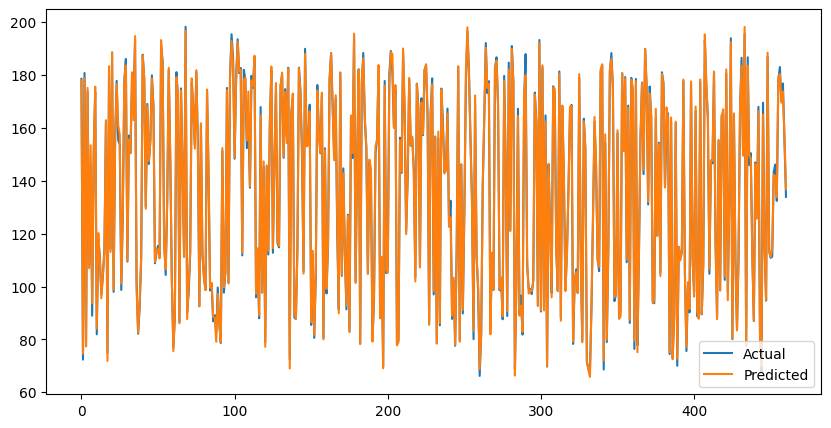

In [8]:
predictions = model.predict(X_test)

# Compare the predictions with the actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Print the model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')


Mean Squared Error: 3.346402946690656
Intercept: 0.29942737109985273
Coefficient: [0.998093]


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [11]:
# Initialize the models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf')

# Train the models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svr.fit(X_train, y_train)


SVR()

In [12]:
# Make predictions
lr_predictions = lr.predict(X_test)
rf_predictions = rf.predict(X_test)
svr_predictions = svr.predict(X_test)

# Combine predictions using simple averaging
combined_predictions = (lr_predictions + rf_predictions + svr_predictions) / 3


Mean Squared Error (Combined): 3.6082390289031006


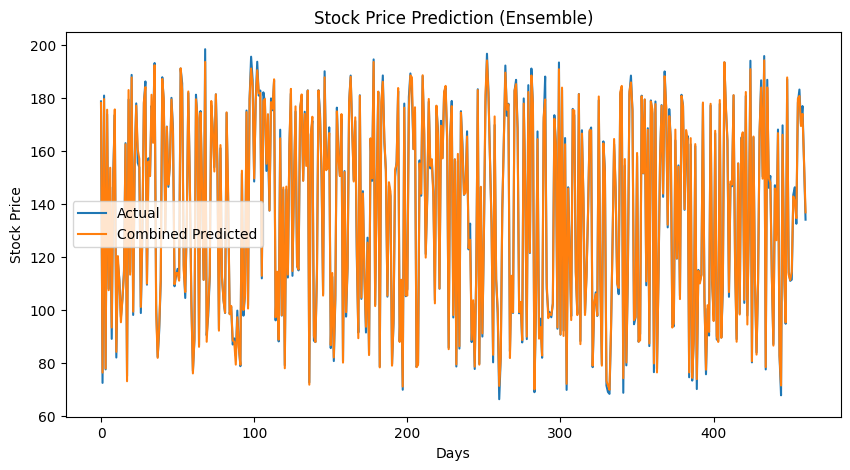

In [13]:
# Calculate the Mean Squared Error
mse_combined = mean_squared_error(y_test, combined_predictions)
print(f'Mean Squared Error (Combined): {mse_combined}')

# Compare the predictions with the actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(combined_predictions, label='Combined Predicted')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction (Ensemble)')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Print the model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')
